In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'DejaVu Sans', 'serif': ['Computer Modern'], 'size':15})
rc('figure', facecolor='w')
import astropy.io.fits as fits
from astropy.io import ascii
import math, os
import itertools

#optional dependencies
from distutils.spawn import find_executable
if find_executable('latex'): rc('text', usetex=True)
else: rc('text', usetex=False)
    
from reduction import reduce, plotImg
from centroid import findStar, removePixels, clusterPoints, findClusterMax, centroid, selectCircle

In [2]:
red = reduce(dataf='data/demo/d159.fits', flatf='data/demo/d121.fits')

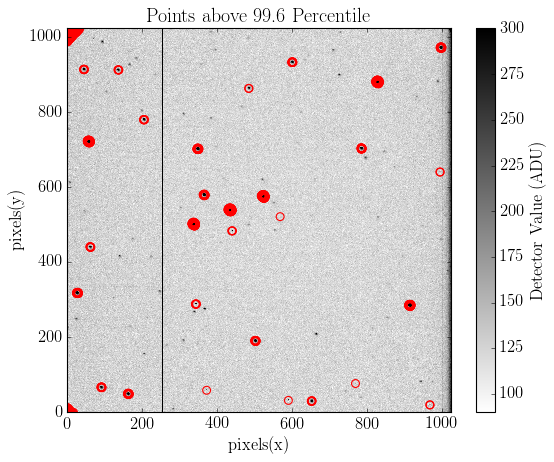

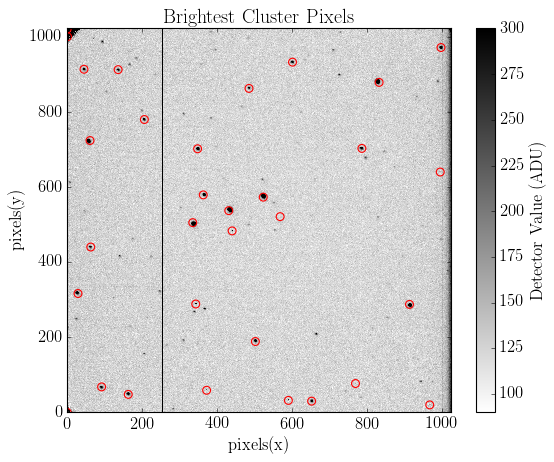

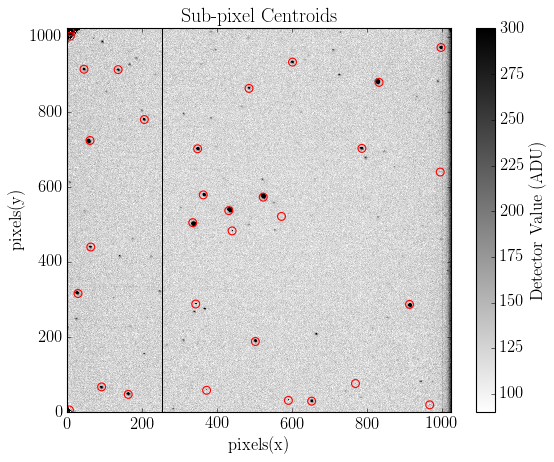

In [5]:
perc = 99.6
star_pts = findStar(red, perc=perc)

bad_col = [255, 256] + list(np.arange(1000,1025))
ptlist = removePixels(star_pts, cols=bad_col)

clusters = clusterPoints(ptlist, radius=5)
peak_pixels = findClusterMax(red, clusters)
centroids = centroid(red, peak_pixels)

plotImg(red, pts=ptlist.T, rng=[90,300], title='Points above %s Percentile'%(perc), \
        save='writeup/plots/identification1.png')
plotImg(red, pts=peak_pixels.T, rng=[90,300], title='Brightest Cluster Pixels', \
        save='writeup/plots/identification2.png')
plotImg(red, pts=centroids.T, rng=[90,300], title='Sub-pixel Centroids', \
        save='writeup/plots/identification3.png')

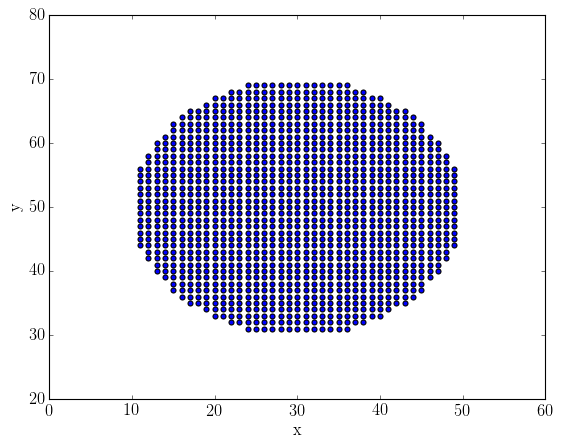

In [308]:
circle_cut = selectCircle(xc=50, yc=30, radius=20)
plt.scatter(np.array(circle_cut).T[0], np.array(circle_cut).T[1])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('writeup/plots/circle_selection.png')
plt.show()

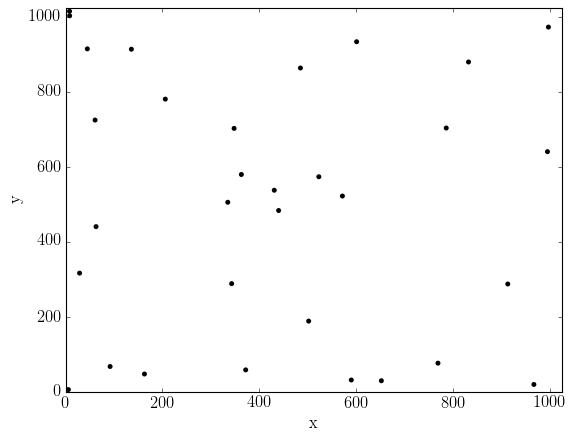

In [296]:
plt.scatter(centroids.T[0], centroids.T[1], color='k', edgecolor='none')
plt.xlim(0,1024)
plt.ylim(0,1024)
plt.xlabel('x')
plt.ylabel('y')
plt.show()